In [6]:
import torch
import cv2
import torchvision
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor


In [5]:
print(f"Torch version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")
print(f"All Systems go")

Torch version: 2.10.0+cu128
Torchvision Version: 0.25.0+cu128
All Systems go


In [ ]:
# %pip install opencv-python
# %pip install git+https://github.com/facebookresearch/segment-anything.git
# %pip uninstall segment-anything -y
# %pip install git+https://github.com/facebookresearch/segment-anything.git
# %pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.6/915.6 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 MB 26.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.1/188.1 MB 35.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: triton
    Found existing installation: triton 3.5.1
    Uninstalling triton-3.5.1:
      Successfully uninstalled triton-3.5.1
  Attempting uninstall: nvidia-nvshmem-cu12
    Found existing installation: nvidia-nvshmem-cu12 3.3.20
    Uninstalling nvidia-nvshmem-cu12-3.3.20:
      Successfully uninstalled nvidia-nvshmem-cu12-3.3.20
  Attempting uninstall: torch
    Found existing installation: torch 2.9.1
    Uninstalling torch-2.9.1:
      Successfully uninstalled torch-2.9.1

[notice] A new release of pip is available: 2

In [7]:
import numpy as np
import os
import glob
import torch
sam_checkpoint = 'sam_vit_b_01ec64.pth'
model_type = "vit_b"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)
folder_path ="/mnt/c/Users/sushm/Pictures/lawn_weed_images"
# 2. Get all .jpg and .png images and sort them alphabetically
# This ensures 'image_1' is always the same file
# 2. Check if the folder actually exists first
if not os.path.exists(folder_path):
    print(f"❌ ERROR: The folder does not exist at {folder_path}")
else:
    # 3. Search for BOTH .jpg and .JPG to be safe
    # We use join to handle the slashes automatically for Windows
    pattern = os.path.join(folder_path, "*.jpg")
    image_files = sorted(glob.glob(pattern) + glob.glob(os.path.join(folder_path, "*.JPG")))
    
    if len(image_files) == 0:
        print("❌ ERROR: No .jpg or .JPG files found in the folder!")
        # Let's see what IS in there
        print("Files found in folder:", os.listdir(folder_path)[:5])
    else:
        print(f"✅ SUCCESS: Found {len(image_files)} images.")
        image1_path = image_files[0]
        image2_path = image_files[1]
        image3_path = image_files[2]
        image4_path = image_files[3]
        image5_path = image_files[4]



✅ SUCCESS: Found 31 images.


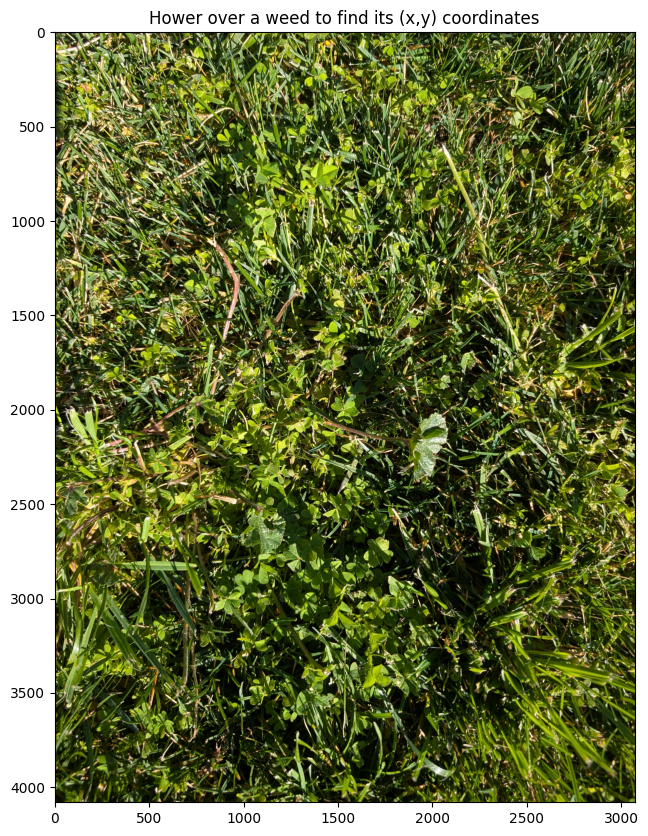

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(image2_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis('on')
plt.title('Hower over a weed to find its (x,y) coordinates')
plt.show()

In [ ]:
# %pip install matplotlib
# 


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
